In [1]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
#loading the dataset
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#showing the corresponding flowers' name
df['target']=iris.target
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


DATA VISUALIZATION

In [5]:
#for data visualization, dividing the dataset into 3 for 3 different flowers
#index 0 => setosa, index 1=> versicolor, index 2=>virginica
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [6]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [8]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


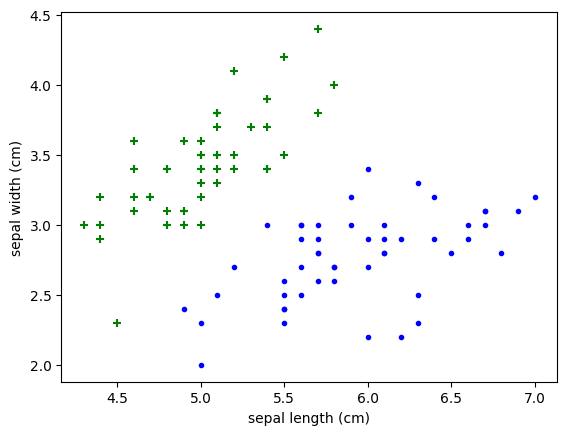

In [9]:
#plotting the setosa and versicolor according to 2 of the 4 features in 2D
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color='blue',marker='.')

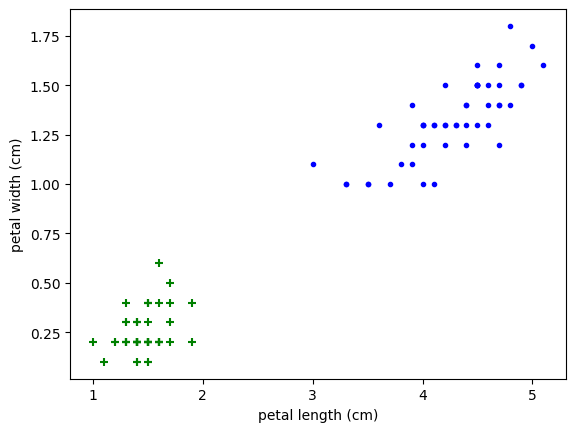

In [39]:
#plotting them with the remaining 2 features
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='blue',marker='.')
#here we also clearly see a dividimg hyperplane

Training

In [40]:
#now for training we are taking only the 4 features
X = df.drop(['target','flower_name'], axis='columns')
y = df.target
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
# splitting the data set into 8:2, where 80% is for training 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# linear kernel

In [42]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [43]:
accuracy_linear = model_linear.score(X_test, y_test)
print('linear kernel accuracy is : ',accuracy_linear)

linear kernel accuracy is :  0.9666666666666667


## polynomial kernel

In [44]:
model_poly = SVC(kernel='poly', degree=3)
model_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [45]:
accuracy_poly = model_poly.score(X_test, y_test)
print('Polynomial kernel accuracy is : ',accuracy_poly)

Polynomial kernel accuracy is :  0.9666666666666667


# rbf kernel

In [46]:
model_rbf =  SVC(kernel='rbf', gamma=0.5)
model_rbf.fit(X_train, y_train)

SVC(gamma=0.5)

In [56]:
accuracy_rbf = model_rbf.score(X_test, y_test)
print('rbf kernel accuracy with gamma = 0.5 is :',accuracy_rbf)

rbf kernel accuracy with gamma = 0.5 is : 0.9


# sigmoid kernel


In [48]:
model_sig = SVC(kernel='sigmoid')
model_sig.fit(X_train, y_train)


SVC(kernel='sigmoid')

In [57]:
accuracy_sig = model_sig.score(X_test, y_test)
print('Sigmoid kernel accuracy is :',accuracy_sig)

Sigmoid kernel accuracy is : 0.16666666666666666


##Different kernels' accuracy comparision

Text(0.5, 0, 'kernels')

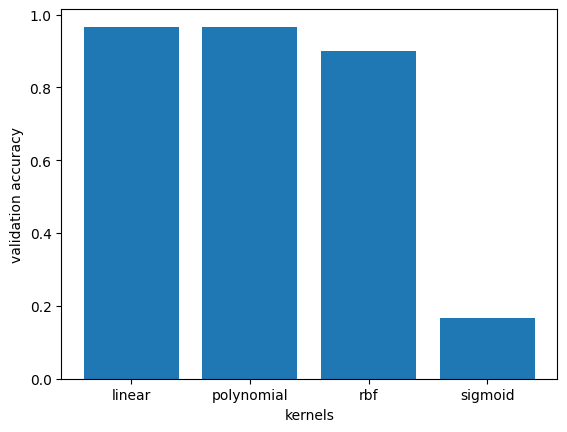

In [53]:
#plotting bar graph to compare the test accuracy of different kernels
import numpy as np
accuracy = [accuracy_linear, accuracy_poly, accuracy_rbf, accuracy_sig]
x = np.arange(4)
plt.bar(x,accuracy)
plt.xticks(x,['linear','polynomial','rbf','sigmoid'])
plt.ylabel('validation accuracy')
plt.xlabel('kernels')

##Different gamma value -> accuracy comparision

In [54]:
#checking test accuracy using different values of gamma in rbf kernel
gamma = [0.3,0.5,0.7,0.9]
acc=[]
for i in range(4):
    model_new = SVC(kernel='rbf', gamma=gamma[i])
    model_new.fit(X_train,y_train)
    acc. append(model_new.score(X_test, y_test))
print(acc)
    

[0.9, 0.9, 0.9, 0.9333333333333333]


Text(0, 0.5, 'validation accuracy')

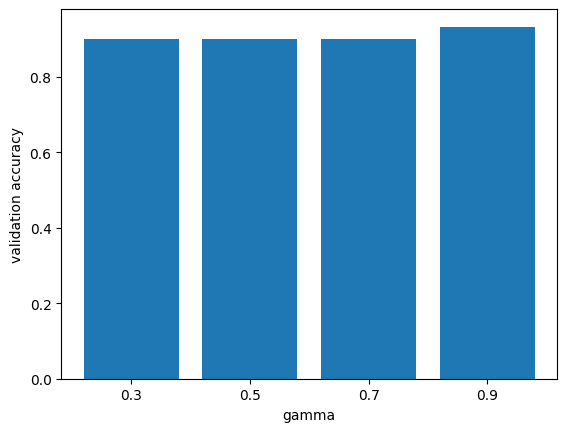

In [55]:
#plotting bar graph of test accuracy and different gamma
z= np.arange(4)
plt.bar(z,acc)
plt.xticks(z,[0.3,0.5,0.7,0.9])
plt.xlabel('gamma')
plt.ylabel('validation accuracy')